# News Data Visualization

Caroline collects certain key data from all the articles on the front page of her favorite news sites. She saves the information every day for a year and stores it in a table.

## Objectives
- Identify correlations between headline font size and article length.
- Track the average length of articles over time.
- Compare distributions of article lengths.

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with real data if available)
data = {
    'date': [
        '2023-01-01', '2023-01-10', '2023-02-05', '2023-02-14', '2023-03-03', '2023-03-12', '2023-04-04',
        '2023-04-20', '2023-05-05', '2023-05-18', '2023-06-06', '2023-06-23', '2023-07-08', '2023-07-15',
        '2023-08-09', '2023-08-22', '2023-09-10', '2023-09-27', '2023-10-11', '2023-10-25', '2023-11-12', 
        '2023-11-28', '2023-12-13', '2023-12-24', '2023-12-31'
    ],
    'page': [
        'bild.de', 'spiegel.de', 'sueddeutsche.de', 'Main-Echo', 'bild.de', 'sueddeutsche.de', 'Main-Echo', 
        'bild.de', 'spiegel.de', 'Main-Echo', 'sueddeutsche.de', 'bild.de', 'spiegel.de', 'sueddeutsche.de',
        'bild.de', 'Main-Echo', 'sueddeutsche.de', 'spiegel.de', 'bild.de', 'Main-Echo', 'bild.de', 
        'spiegel.de', 'Main-Echo', 'sueddeutsche.de', 'bild.de', 'spiegel.de'
    ],
    'headline_font_size': [
        20, 14, 18, 16, 22, 24, 15, 17, 19, 21, 23, 12, 20, 18,
        15, 19, 17, 22, 25, 14, 16, 20, 21, 13, 18, 16
    ],
    'article_length': [
        206, 503, 782, 300, 150, 890, 456, 310, 789, 320, 645, 220, 532, 470,
        260, 710, 530, 800, 405, 278, 165, 450, 320, 600, 150, 560
    ],
    'topic': [
        'Economy', 'Politics', 'Health', 'Economy', 'Sports', 'Science', 'Technology', 'Business', 
        'Politics', 'Health', 'Economy', 'Sports', 'Politics', 'Culture', 'Science', 'Technology', 
        'Economy', 'Sports', 'Business', 'Culture', 'Technology', 'Economy', 'Health', 'Science', 
        'Politics', 'Sports'
    ]
}


df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df

,date,page,headline_font_size,article_length,topic
0,2023-01-01,bild.de,20,206,Economy
1,2023-01-01,spiegel.de,14,503,Politics
2,2023-01-02,sueddeutsche.de,18,782,Health
3,2023-01-02,Main-Echo,16,300,Economy
4,2023-01-03,bild.de,22,150,Sports
5,2023-01-04,sueddeutsche.de,24,890,Science
6,2023-01-04,Main-Echo,15,456,Technology
7,2023-01-05,bild.de,17,310,Business
8,2023-01-05,spiegel.de,19,789,Politics
9,2023-01-06,Main-Echo,21,320,Health


Is there a correlation between the font size of the headline and the length of the article?

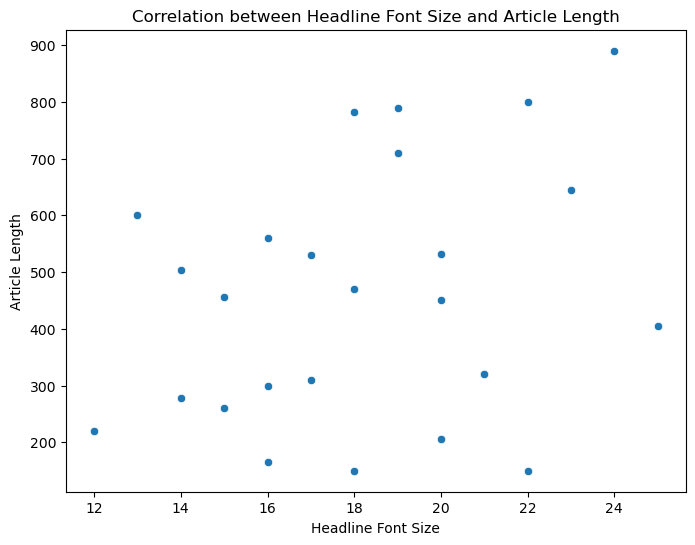

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="headline_font_size", y="article_length", data=df)
plt.title('Correlation between Headline Font Size and Article Length')
plt.xlabel('Headline Font Size')
plt.ylabel('Article Length')
plt.show()

How does the average length of the articles change over the course of the year?


In [8]:
df["month"] = df["date"].dt.strftime("%B")
avg_length = df.groupby("month")["article_length"].mean().reset_index()

df

,date,page,headline_font_size,article_length,topic,month
0,2023-01-01,bild.de,20,206,Economy,January
1,2023-01-01,spiegel.de,14,503,Politics,January
2,2023-01-02,sueddeutsche.de,18,782,Health,January
3,2023-01-02,Main-Echo,16,300,Economy,January
4,2023-01-03,bild.de,22,150,Sports,January
5,2023-01-04,sueddeutsche.de,24,890,Science,January
6,2023-01-04,Main-Echo,15,456,Technology,January
7,2023-01-05,bild.de,17,310,Business,January
8,2023-01-05,spiegel.de,19,789,Politics,January
9,2023-01-06,Main-Echo,21,320,Health,January
